In [1]:
import os, glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'axes.labelsize': 'large',
    'figure.dpi': 100,
})

In [2]:
# Import all measurements from the `./measurements` directory. Each measurement file
# is read into a numpy array (column-first) and added to the `meas_dict` (keys are
# filenames with extentions removed).
def ignored(row):
    return (str.isspace(row) or
            str.lstrip(row)[0] == '#')
meas_dict = {}
suffix, sep = 'csv', ','
for fname in glob.glob(f'./measurements/*.{suffix}'):
    with open(fname) as file:
        meas = [[float(el) for el in row.rstrip().split(sep)]
                for row in file.readlines() if not ignored(row)]
        meas_name, _ = str.rsplit(os.path.basename(fname), '.', maxsplit=1)
        meas_dict[meas_name] = np.array(meas).T

In [3]:
meas_dict.keys()

dict_keys(['peaks-180', 'peaks-160', 'peaks-141', 'peaks-120'])

(5.0, 0.125)

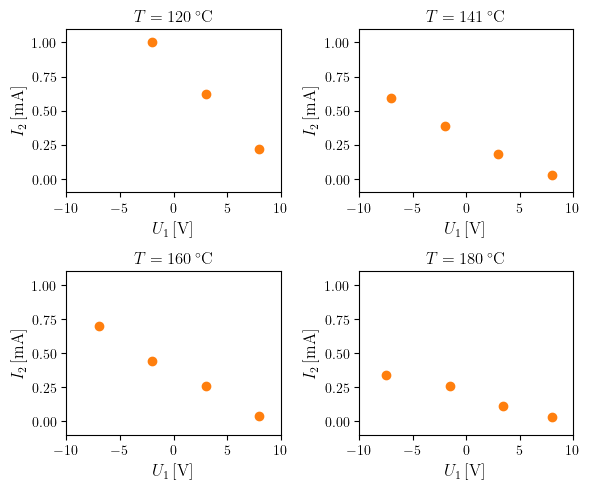

In [52]:
# Plot
R = 1e3
q_0 = 1.602e-19
fig, axs = plt.subplots(2, 2, figsize=[6, 5])

aux = [
    [120, 141, 160, 180],
    axs.flat
]
res = []
for T, ax in zip(*aux):
    U_1, U_2 = meas_dict[f'peaks-{T}']
    U_1 = U_1[1:]
    U_2 = U_2[1:] - U_2[0]
    I_2 = U_2/R
    
    # Calculate ΔE
    ΔU = np.diff(U_1) # Also ΔE in eV
    res.append(ΔU)
    
    ax.scatter(U_1, 1e3 * I_2, label=r'meritve', color='tab:orange')

    ax.set_title(f'$T = {T}\\,\\mathrm{{^\circ C}}$')
    ax.set_xlabel(r'$U_1\,[\mathrm{V}]$')
    ax.set_ylabel(r'$I_2\,[\mathrm{mA}]$')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-0.1, 1.1)
fig.tight_layout()
fig.savefig('I_2-by_U_1.pdf')

ΔU = np.mean(list(map(np.mean, res)))
ΔΔU = np.mean([(ΔU - dU)**2 for arr in res for dU in arr])
ΔU, ΔΔU